In [12]:
##### 1     #1. Implement a function to train a linear regression model using stochastic gradient 
#descent (SGD) with mini-batch updates. The function should include options for 
#different learning rates, batch sizes, and a regularization term



import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

def train_linear_regression(X, y, learning_rate=0.01, batch_size=32, regularization=None, max_iterations=1000):
    
    # Standardize the input features for better convergence
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize the SGDRegressor with the given parameters
    model = SGDRegressor(
        loss='squared_error',  # Change this to 'squared_error'
        learning_rate='constant',
        eta0=learning_rate,
        alpha=regularization,
        max_iter=max_iterations,
        tol=1e-3,
        random_state=np.random.RandomState(42)  # Use NumPy's random state for reproducibility
    )
    
    # Train the model in mini-batches
    n_samples = X_scaled.shape[0]
    for _ in range(max_iterations):
        indices = np.random.permutation(n_samples)
        for start_idx in range(0, n_samples, batch_size):
            end_idx = start_idx + batch_size
            batch_indices = indices[start_idx:end_idx]
            X_batch = X_scaled[batch_indices]
            y_batch = y[batch_indices]
            model.partial_fit(X_batch, y_batch)
    
    return model

X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])
y = np.array([3, 4, 5, 6])
learning_rate = 0.01
batch_size = 2
num_iterations = 1000
regularization_term = 0.1

# Train the linear regression model
model = train_linear_regression(X, y, learning_rate, batch_size, regularization_term, num_iterations)
model.coef_
# Get the coefficients of the trained model
coefficients = model.coef_
print("Coefficients:", coefficients)


Coefficients: [0.         1.01711241]


In [13]:
#####2 2. Write a function to implement linear regression with Lasso regularization (L1 
#regularization) using coordinate descent. The function should allow for different 
#regularization parameters and tolerance levels for convergence.




from sklearn.linear_model import Lasso
X = [[1, 1], [1, 2], [1, 3], [1, 4]]
y = [3, 4, 5, 6]
regularization_param = 0.1
tolerance = 0.001
def train_linear_regression_with_lasso(X, y, alpha, tol):
    
    
     # Initialize the Lasso model with the given parameters
    model = Lasso(alpha=alpha,
    tol=tol,
    random_state=0)
    # Train the model
    model.fit(X, y)
    return model
model = train_linear_regression_with_lasso(X, y,regularization_param, tolerance)
model.coef_


array([0.  , 0.92])

In [12]:
####3

#Create a program that performs logistic regression with L1 regularization (Lasso) using coordinate descent.
    
import numpy as np
from sklearn.linear_model import LogisticRegression
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [0, 0, 1, 1]
regularization_param = 0.1
tolerance = 0.001
def logistic_regression_with_l1_regularization(X, y, regularization_param, tolerance):
    
    
 # Create the Logistic Regression model with L1 regularization
    model = LogisticRegression(penalty='l1',C=1/regularization_param,tol=tolerance,solver='liblinear',random_state=0)
    # Train the model
    model.fit(X, y)
    return model
model = logistic_regression_with_l1_regularization(X, y,regularization_param,tolerance)
model.coef_


array([[2.23260945, 0.        ]])

In [14]:
#####4  #ROC curve
from sklearn.metrics import roc_auc_score
y_true = [0, 1, 1, 0, 1]
y_pred = [0.2, 0.8, 0.6, 0.3, 0.9]
def calculate_auc(y_true, y_pred):
    
    auc = roc_auc_score(y_true, y_pred)
    return auc
auc_score = calculate_auc(y_true, y_pred)
print("Area Under the ROC Curve (AUC): {:.2f}".format(auc_score))
           

Area Under the ROC Curve (AUC): 1.00


In [1]:
#####5   5. Write a program to calculate the log loss (binary cross-entropy) for a logistic regression model 
#using vectorized operations.

import numpy as np
from sklearn.metrics import log_loss
# Input data
y_true = np.array([0, 1, 1, 0])
y_pred = np.array([0.2, 0.8, 0.9, 0.3])
# Ensure y_pred is within [epsilon, 1-epsilon] to avoid log(0) and log(1) issues
epsilon = 1e-15
y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
# Calculate the log loss (binary cross-entropy)
logloss = log_loss(y_true, y_pred)
print("Log Loss (Binary Cross-Entropy):", logloss)

Log Loss (Binary Cross-Entropy): 0.22708064055624455


In [14]:
####6  Write a program to predict the class labels for new input data using a trained decision 
#tree classifier.

from sklearn.tree import DecisionTreeClassifier

# Input data
X_train = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [0, 0, 1, 1]
X_val = [[2, 4], [1, 3], [3, 5]]

# Create the decision tree classifier with CART algorithm
clf = DecisionTreeClassifier(random_state=0)

# Train the model using the input data
clf.fit(X_train, y)
predictions = clf.predict(X_val)
predictions




array([1, 0, 1])

Decision Tree Text Representation:
|--- Feature 2 <= 3.50
|   |--- class: 0
|--- Feature 2 >  3.50
|   |--- class: 1



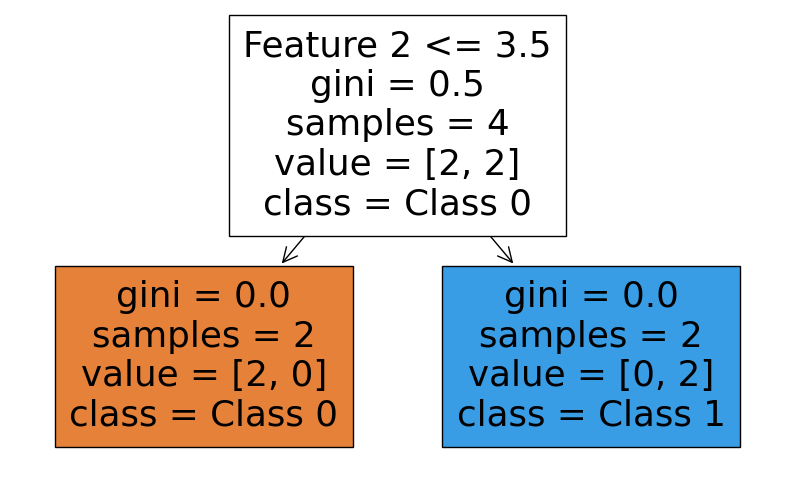

In [30]:

####7  Create a function to visualize a decision tree using a graph representation.
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import numpy as np
# Input data
X = [[1, 2], [2, 3], [3, 4], [4, 5]]
y = [0, 0, 1, 1]
def visualize_decision_tree(X, y):
    
    
 # Create the decision tree classifier with CART algorithm
    clf = DecisionTreeClassifier()

 # Train the model using the input data
    clf.fit(X, y)
 # Obtain a text representation of the decision tree
    tree_text = export_text(clf, feature_names=[f'Feature {i+1}' for i in range(len(X[0]))])
    print("Decision Tree Text Representation:")
    print(tree_text)
 # Create a graphical representation of the decision tree
    plt.figure(figsize=(10, 6))
    plot_tree(clf,filled=True,feature_names=[f'Feature {i+1}' for i in range(len(X[0]))],class_names=['Class 0', 'Class 1'])
    plt.show()
# Call the visualization function
visualize_decision_tree(X, y)


In [31]:
#####8 Write a program to perform hierarchical clustering using the complete linkage method.


import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
# Input data
X = np.array([[1, 2], [2, 3], [10, 12], [11, 13], [20, 25], [22, 24]])
# Perform hierarchical clustering using complete linkage
clustering = AgglomerativeClustering(linkage='complete')
clustering.fit(X)
# Get the cluster assignments for each data point
labels = clustering.labels_
labels

array([0, 0, 0, 0, 1, 1], dtype=int64)

In [3]:
######9 Implement a program to perform density-based clustering using the DBSCAN algorithm.



from sklearn.cluster import DBSCAN
import numpy as np
# Input data
X = np.array([[1, 2], [2, 3], [10, 12], [11, 13], [20, 25], [22, 24]])
epsilon = 3
min_samples = 2
def perform_dbscan_clustering(X, epsilon, min_samples):
    
 # Create a DBSCAN object with the specified epsilon and min_samples
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
 # Perform clustering on the data
    clustering_labels = dbscan.fit_predict(X)
 # Return the clustering labels
    return clustering_labels
# Perform DBSCAN clustering
labels = perform_dbscan_clustering(X, epsilon, min_samples)
labels


array([0, 0, 1, 1, 2, 2], dtype=int64)

In [46]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [24]:
####10

import skfuzzy as fuzz
import numpy as np
x=np.array([[1,2],[2,3],[10,12],[11,13],[20,25],[22,24]])
c=3
def fuzzy_clustering(x,c):
    n_samples=x.shape[0]
    n_features=x.shape[1]
    max_iter=1000
    fuzziness=2.0
    epsilon=1e-6
    cluster_centres=np.random.rand(c,n_samples)
    cntr,u,_,_,_,_,_=fuzz.cluster.cmeans(x.T,c,m=fuzziness,error=epsilon,maxiter=max_iter,init=cluster_centres)
    return cntr.T
cc=fuzzy_clustering(x,c)
print("cluster centres:",cc)














cluster centres: [[ 1.49978898 21.00036145 10.50030209]
 [ 2.49980212 24.49974085 12.50033273]]
